In [41]:
import math 
import statistics 
import numpy as np 
import scipy.stats 
import pandas as pd

import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# untuk cek akurasi kita gunakan metric
from sklearn.metrics import confusion_matrix, classification_report

# preprocessing data string jadi numerik
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# untuk visualisasi decision tree, kita perlu bantuan bbrp package
import sklearn.tree as tree
from six import StringIO 
import pydotplus 
from IPython.display import Image

## Explatory

In [7]:
#Load Data
df =  pd.read_csv('dataset/bank.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
for col in df.columns:
    print(col, '\n', df[col].unique(), '\n')

age 
 [30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84] 

job 
 ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown'] 

marital 
 ['married' 'single' 'divorced'] 

education 
 ['primary' 'secondary' 'tertiary' 'unknown'] 

default 
 ['no' 'yes'] 

balance 
 [ 1787  4789  1350 ...  -333 -3313  1137] 

housing 
 ['no' 'yes'] 

loan 
 ['no' 'yes'] 

contact 
 ['cellular' 'unknown' 'telephone'] 

day 
 [19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24] 

month 
 ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec'] 

duration 
 [  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182  247  119
  149   74  

In [17]:
#encoding

le= LabelEncoder()
df_en =pd.DataFrame()

for col in df.columns:
    if df[col].dtypes == object:
        df_en[col]= le.fit_transform(df[col])
        print(col, le.classes_)
    else:
        df_en[col]= df[col]

job ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ['divorced' 'married' 'single']
education ['primary' 'secondary' 'tertiary' 'unknown']
default ['no' 'yes']
housing ['no' 'yes']
loan ['no' 'yes']
contact ['cellular' 'telephone' 'unknown']
month ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome ['failure' 'other' 'success' 'unknown']
y ['no' 'yes']


In [18]:
df_feature = df_en.drop(columns=["y"])
df_target = df_en["y"]

In [21]:
#split data jadi training dfan testing data
#data testing 20% saja sisanya untuk training
x_train, x_test, y_train, y_test = train_test_split(df_feature, df_target, random_state=0, test_size =0.2)

print(x_train.shape, x_test.shape)

(3616, 16) (905, 16)


# Logistic Regresion

In [23]:
# buat dan latih model

model_lr = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)

In [25]:
# evaluasi
y_prediksi = model_lr.predict(x_test)

# confusion matrix
confusion_matrix(y_test, y_prediksi)

array([[767,  26],
       [ 84,  28]], dtype=int64)

# KNN

In [29]:
# buat model dan latih model
model_knn = KNeighborsClassifier(n_neighbors=1).fit(df_feature, df_target)

In [30]:
# evaluasi
hasil_prediksi = model_knn.predict(df_feature)
print(classification_report(df_target, hasil_prediksi))
print(confusion_matrix(df_target, hasil_prediksi))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521

[[4000    0]
 [   0  521]]


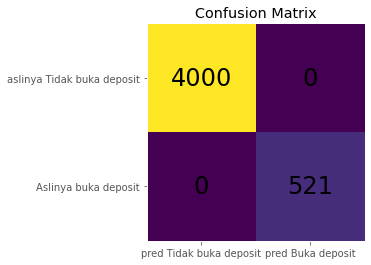

In [31]:
# visualisasi confusion matrix
cm = confusion_matrix(df_target, hasil_prediksi)

fig, ax = plt.subplots(figsize=(4, 4)) 
ax.imshow(cm) 
ax.grid(False) 
ax.xaxis.set(ticks=(0, 1), ticklabels=('pred Tidak buka deposit', 'pred Buka deposit')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('aslinya Tidak buka deposit', 'Aslinya buka deposit')) 
ax.set_ylim(1.5, -0.5) 

for i in range(2): 
    for j in range(2): 
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24) 

plt.title("Confusion Matrix")        
plt.show()

# SVM

In [34]:
# buat dan latih model
model_svm = SVC().fit(x_train, y_train)

In [35]:
# evaluasi
hasil_prediksi = model_svm.predict(x_test)
print(classification_report(y_test, hasil_prediksi))
print(confusion_matrix(y_test, hasil_prediksi))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       793
           1       0.00      0.00      0.00       112

    accuracy                           0.88       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.77      0.88      0.82       905

[[793   0]
 [112   0]]


C:\Users\Oscar Forendo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oscar Forendo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oscar Forendo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

# Naive Bayes

In [47]:
# buat dan latih model
model_nb = GaussianNB()
model_nb.fit(df_feature, df_target)

# evaluasi
hasil_prediksi = model_nb.predict(df_feature)
print(classification_report(df_target, hasil_prediksi))
print(confusion_matrix(df_target, hasil_prediksi))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      4000
           1       0.34      0.43      0.38       521

    accuracy                           0.84      4521
   macro avg       0.63      0.66      0.64      4521
weighted avg       0.86      0.84      0.85      4521

[[3564  436]
 [ 297  224]]


# Decision Tree

In [38]:
# buat dan latih model
model_tree = DecisionTreeClassifier().fit(x_train, y_train)

# evaluasi
hasil_prediksi = model_tree.predict(x_test)
print(classification_report(y_test, hasil_prediksi))
print(confusion_matrix(y_test, hasil_prediksi))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       793
           1       0.51      0.48      0.50       112

    accuracy                           0.88       905
   macro avg       0.72      0.71      0.71       905
weighted avg       0.88      0.88      0.88       905

[[741  52]
 [ 58  54]]


In [39]:
df_feature.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [ ]:
# optional: visualisasi Decision Tree
dot_data = StringIO()
tree.export_graphviz(model_tree, 
        out_file=dot_data, 
        class_names=['no','yes'], # the target names. 
        feature_names=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'], # the feature names. 
        filled=True, # Whether to fill in the boxes with colours. 
        rounded=True, # Whether to round the corners of the boxes. 
        special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# Random Forest

In [44]:
# buat dan latih model, kemudian evaluasi
model_forest = RandomForestClassifier(max_depth=3)
model_forest.fit(x_train, y_train)

hasil_prediksi = model_forest.predict(x_test)
print(classification_report(y_test, hasil_prediksi))
print(confusion_matrix(y_test, hasil_prediksi))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       793
           1       0.00      0.00      0.00       112

    accuracy                           0.88       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.77      0.88      0.82       905

[[793   0]
 [112   0]]


C:\Users\Oscar Forendo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oscar Forendo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oscar Forendo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Kesimpulan : dari semua algoritma yang dicoba, KNN memiliki tingkat precision paling tinggi